In [1]:
# Plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from skimage import io, color
from skimage.util.shape import view_as_blocks

# Solution to Ex 1.1
---

In [2]:
#
# Ex 1.1
#

# First way

# def avg_H(img_file):
#     img_rgb = io.imread(img_file)
#     img_hsv = color.rgb2hsv(img_rgb)
#     return img_hsv[:,:,0].mean()

# Another, possibly "cooler" solution
avg_H = lambda f: color.rgb2hsv(io.imread(f))[:,:,0].mean()

In [3]:
print "Average H value: {:.4f}".format(avg_H('beach.jpg'))

Average H value: 0.4088


# Solution to Ex 1.2
---

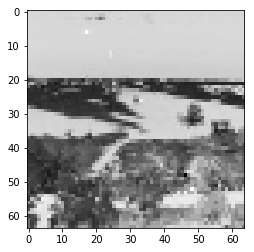

In [13]:
#
# Ex 1.2
#

def avg_H_blocks(img_file, block_size=(4,4)):
    img_rgb = io.imread(img_file)

    # some initial checks
    assert len(block_size) == 2
    assert img_rgb.shape[0] % block_size[0] == 0
    assert img_rgb.shape[1] % block_size[1] == 0
    
    # read image and convert to HSV
    img_hsv = color.rgb2hsv(img_rgb)  
    
    # split into non-overlapping blocks
    B = view_as_blocks(img_hsv[...,0], block_size)
    
    # get nr. of blocks in x,y dir.
    N, M = B.shape[0], B.shape[1]
    
#
# One way to do it
#       
#     R = np.zeros((N,M))
#     for i in np.arange(N):
#         for j in np.arange(M):
#             R[i,j] = B[i,j,:,:].mean()

#
# Another, more pythonic way
#
#     R = np.zeros((N,M))
#     for i,j in np.ndindex(B.shape[0:2]):
#         R[i,j] = B[i,j,:,:].mean()    


# Even more pythonic
#
    return np.array([B[i,j,:,:].mean() for i,j in np.ndindex(B.shape[0:2])]).reshape(N,M)
    #R = np.array([B[i,j,:,:].mean() for i,j in np.ndindex(B.shape[0:2])]).reshape(N,M)
    #return R

#import time
#t0 = time.time()
#R = avg_H_blocks('beach.jpg',(4,4))
#ela = time.time()-t0
#print "Elapsed time [s]: {}".format(ela)
#plt.imshow(R, cmap='gray')

In [11]:
R

array([[ 0.56391157,  0.56291755,  0.55951675,  0.55952369,  0.54588886,
         0.5168129 ,  0.56007321,  0.56161279,  0.55319463,  0.56002712,
         0.56320892,  0.56310138,  0.56368949,  0.56460508,  0.56466607,
         0.56282305],
       [ 0.56652183,  0.56505351,  0.56468518,  0.564791  ,  0.57287688,
         0.56423912,  0.5645338 ,  0.563463  ,  0.56416923,  0.56432593,
         0.56662819,  0.56506977,  0.56683963,  0.56667783,  0.56823687,
         0.56828499],
       [ 0.56690388,  0.56542291,  0.56436245,  0.56449907,  0.56385361,
         0.56346858,  0.56267491,  0.56270003,  0.56331133,  0.56324173,
         0.56301411,  0.56335147,  0.56402378,  0.56394784,  0.5652898 ,
         0.56543098],
       [ 0.55825189,  0.55694972,  0.55588805,  0.55527437,  0.55423708,
         0.5540625 ,  0.55780962,  0.55333864,  0.55404716,  0.55423794,
         0.55478999,  0.55522638,  0.55617314,  0.55696799,  0.55859418,
         0.55877375],
       [ 0.53937693,  0.54402995,  0